<a href="https://colab.research.google.com/github/inakizardain/inakizardain/blob/main/DIDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import statsmodels.formula.api as sm

In [38]:
# Uploading Total_Visitors_Monthly
# This dataset contains the total number of visitors from DIDI's database divided by month and year.

uploaded=files.upload()

Saving total_visitors_monthly.csv to total_visitors_monthly (1).csv


In [39]:
# Reading the information
df = pd.read_csv('total_visitors_monthly.csv', delimiter=',')

In [40]:
# Taking a look to the new information
df

,year,month,total_visitors
0,2016,1,906
1,2016,2,868
2,2016,3,1307
3,2016,4,1340
4,2016,5,833
5,2016,6,1205
6,2016,7,1280
7,2016,9,2
8,2016,10,901
9,2016,11,4809


In [41]:
# Switching information into a datetime format, assignig the day as the 1st day of the month for simplicity
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Defining the date as an index
df.set_index('date', inplace=True)


In [42]:
df

,year,month,total_visitors
date,,,
2016-01-01,2016,1,906
2016-02-01,2016,2,868
2016-03-01,2016,3,1307
2016-04-01,2016,4,1340
2016-05-01,2016,5,833
2016-06-01,2016,6,1205
2016-07-01,2016,7,1280
2016-09-01,2016,9,2
2016-10-01,2016,10,901


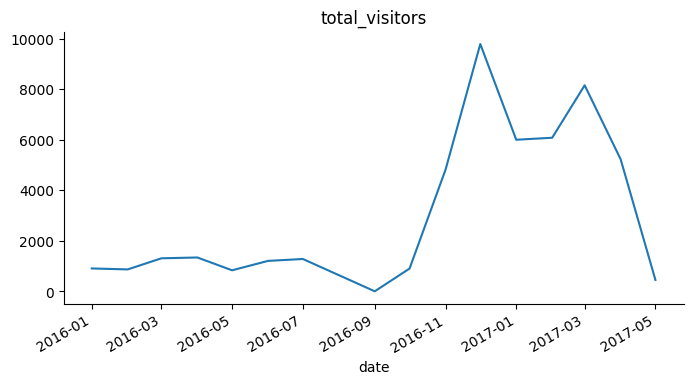

In [43]:
from matplotlib import pyplot as plt
df['total_visitors'].plot(kind='line', figsize=(8, 4), title='total_visitors')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
df2 = df[df['year'] != 2017]
df2

,year,month,total_visitors
date,,,
2016-01-01,2016,1,906
2016-02-01,2016,2,868
2016-03-01,2016,3,1307
2016-04-01,2016,4,1340
2016-05-01,2016,5,833
2016-06-01,2016,6,1205
2016-07-01,2016,7,1280
2016-09-01,2016,9,2
2016-10-01,2016,10,901


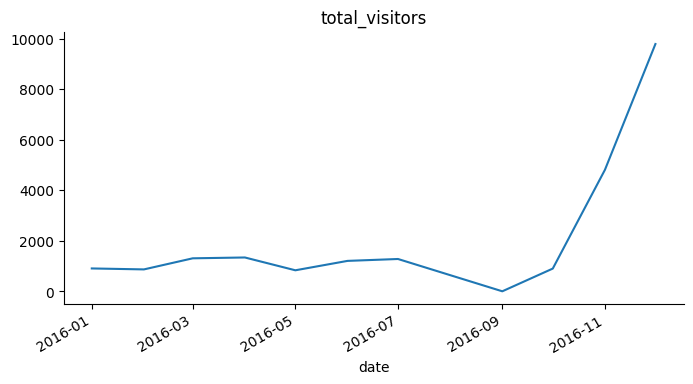

In [45]:
df2['total_visitors'].plot(kind='line', figsize=(8, 4), title='total_visitors')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:
df

,year,month,total_visitors
date,,,
2016-01-01,2016,1,906
2016-02-01,2016,2,868
2016-03-01,2016,3,1307
2016-04-01,2016,4,1340
2016-05-01,2016,5,833
2016-06-01,2016,6,1205
2016-07-01,2016,7,1280
2016-09-01,2016,9,2
2016-10-01,2016,10,901


In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Extracting only information about total visitors so that we proceed with a forecast.
ts = df['total_visitors']

# Fit the ARIMA model (you may need to tune the p, d, q parameters)
# I decided to use p = 6 to make a forecast where new values are related to values from 6 months ago
# d = 1 because ADF proved non stationary information
# q = 1 for a 1 lag fo forecast error
model = ARIMA(ts, order=(6, 1, 1))
model_fit = model.fit()

# Forecast for the next 6 months
forecast = model_fit.forecast(steps=6)

# Replace any negative forecast values with zero
forecast[forecast < 0] = 0

print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


16    1619.532576
17    3822.999395
18    2401.727572
19    2204.976467
20    5334.261052
21    6219.567757
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [48]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF (Augmented Dicky Fuller) test
# This test helps to see if data is stationary or not. In case it is, we would have p-values < 0.05 and we have to add as a paremeter d = 0 in the ARIMA forectas (parameters = (p, d, q))
adf_test = adfuller(ts)

# Output the results
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value}')

# We can see that data is not stationary, thus I will use d = 1 as an example

ADF Statistic: 2.023011973382789
p-value: 0.9987021168321055
Critical Values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124


In [49]:
# adding new rows to our original df

new_rows = pd.DataFrame({'year': [2017, 2017, 2017, 2017, 2017, 2017], 'month': [6, 7, 8, 9, 10, 11], 'total_visitors': [1620, 3823, 2402, 2205, 5332, 6220]})

In [50]:
# Joining df and new_rows and creatin df2 as a final result

df2 = pd.concat([df, new_rows], ignore_index = True)

df2

,year,month,total_visitors
0,2016,1,906
1,2016,2,868
2,2016,3,1307
3,2016,4,1340
4,2016,5,833
5,2016,6,1205
6,2016,7,1280
7,2016,9,2
8,2016,10,901
9,2016,11,4809


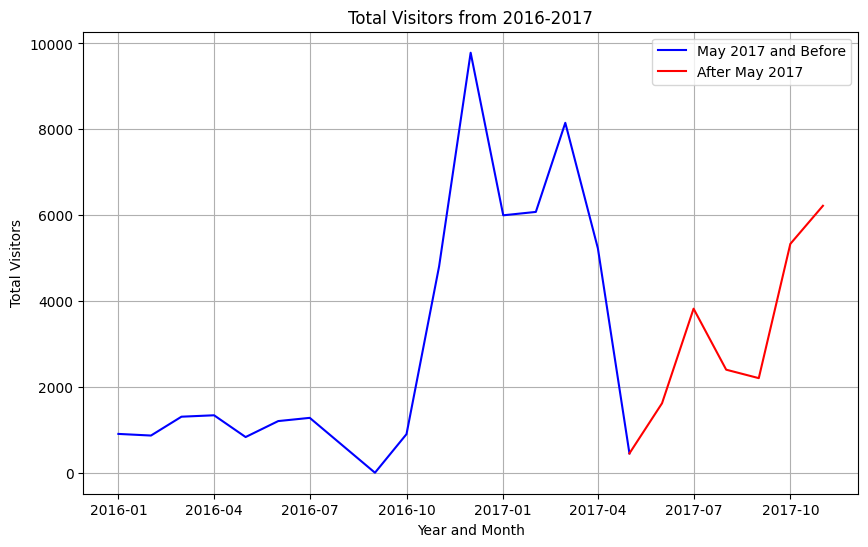

In [51]:
# Plotting  df2 so the the new results.

df2['date'] = pd.to_datetime(df2[['year', 'month']].assign(day=1))

# Dividing preiods for the chart
before_may_2017 = df2[df2['date'] <= '2017-05-01']
after_may_2017 = df2[df2['date'] >= '2017-05-01']

plt.figure(figsize=(10, 6))
plt.plot(before_may_2017['date'], before_may_2017['total_visitors'], color='blue', label='May 2017 and Before')
plt.plot(after_may_2017['date'], after_may_2017['total_visitors'], color='red', label='After May 2017')
plt.title('Total Visitors from 2016-2017')
plt.xlabel('Year and Month')
plt.ylabel('Total Visitors')
plt.legend()
plt.grid(True)


In [52]:
from sklearn.metrics import mean_absolute_error

# In order to see how good my forecast is I will split the data between the last 6 values as test and all previous information as train
ts2 = df2['total_visitors']
train = ts2[:-6]
test = ts2[-6:]

# Fit the ARIMA model to train
model = ARIMA(train, order=(6, 1, 1))
model_fit = model.fit()

# Forecast for the next 6 months (same length as the test set)
forecast2 = model_fit.forecast(steps=6)

# Replace any negative forecast values with zero
forecast2[forecast2 < 0] = 0

# Calculate the Mean Absolute Error (MAE) to validate the forecast2
mae = mean_absolute_error(test, forecast2)
print(f'Mean Absolute Error: {mae}')

# We obtained a MAE = 0.58
# This result is good, meaning that our predictions are close to actual values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean Absolute Error: 0.5762142491605573


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
